## Machine Learning - Session 4 -  Data Exploration and Data Manipulation

## Part 1 - Data Exploration

In [1]:
# Set the working directory
import os
os.chdir("C:\\Users\\Praveen\\Downloads")

#Read the cars.csv data
import pandas as pd
cars = pd.read_csv("cars.csv")
#ucl Machine Learning repository

In [2]:
cars.shape


(406, 9)

#### 1. Summaries and Aggregates

In [3]:
#A. The describe() method
cars.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.051232,5.475369,194.779557,103.529557,2979.413793,15.519704,75.921182
std,8.401777,1.712160,104.922458,40.520659,847.004328,2.803359,3.748737
min,0.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2226.500000,13.700000,73.000000
50%,22.350000,4.000000,151.000000,93.500000,2822.500000,15.500000,76.000000
75%,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [4]:
cars[["MPG","Weight"]].describe()

,MPG,Weight
count,406.000000,406.000000
mean,23.051232,2979.413793
std,8.401777,847.004328
min,0.000000,1613.000000
25%,17.000000,2226.500000
50%,22.350000,2822.500000
75%,29.000000,3618.250000
max,46.600000,5140.000000


In [5]:

cars["Weight"].mean()

2979.4137931034484

In [6]:
#A. Aggregates - groupby() method
cars[["Weight","Origin"]].groupby(["Origin"]).mean()

,Weight
Origin,
Europe,2431.493151
Japan,2221.227848
US,3372.700787


In [7]:
cars[["Weight","Cylinders"]].groupby(["Cylinders"]).mean()

,Weight
Cylinders,
3,2398.500000
4,2312.685990
5,3103.333333
6,3198.226190
8,4105.194444


In [8]:
cars[["Weight","Origin"]].groupby(["Origin"]).describe()

Weight                                                             \
        count         mean         std     min      25%     50%      75%   
Origin                                                                     
Europe   73.0  2431.493151  490.883617  1825.0  2065.00  2246.0  2800.00   
Japan    79.0  2221.227848  320.497248  1613.0  1985.00  2155.0  2412.50   
US      254.0  3372.700787  791.695866  1800.0  2721.25  3380.5  4054.75   

                
           max  
Origin          
Europe  3820.0  
Japan   2930.0  
US      5140.0

In [10]:
cars[["Weight","Origin"]].groupby(["Origin"]).describe()

Weight                                                             \
        count         mean         std     min      25%     50%      75%   
Origin                                                                     
Europe   73.0  2431.493151  490.883617  1825.0  2065.00  2246.0  2800.00   
Japan    79.0  2221.227848  320.497248  1613.0  1985.00  2155.0  2412.50   
US      254.0  3372.700787  791.695866  1800.0  2721.25  3380.5  4054.75   

                
           max  
Origin          
Europe  3820.0  
Japan   2930.0  
US      5140.0

In [11]:
cars[["Weight","Origin"]].groupby(["Origin"]).median()

,Weight
Origin,
Europe,2246.0
Japan,2155.0
US,3380.5


In [12]:
cars[["Weight","Cylinders"]].groupby(["Cylinders"]).median()

,Weight
Cylinders,
3,2375.0
4,2234.0
5,2950.0
6,3201.5
8,4137.5


#### 2. Tables (Crosstabs)

In [13]:
#A.Univariate Frequency distribution of a categorical variable (say, Origin)
tab=pd.crosstab(cars.Origin,columns="counts")        #univariable frequency dist-single column 
tab

col_0,counts
Origin,
Europe,73
Japan,79
US,254


In [14]:
type(tab)

pandas.core.frame.DataFrame

In [15]:
tab.sum()

col_0
counts    406
dtype: int64

In [16]:
#B. Univariate table of proportion
tab/tab.sum()*100

col_0,counts
Origin,
Europe,17.980296
Japan,19.458128
US,62.561576


In [17]:
#B. Univariate table of proportion
round(tab/tab.sum()*100,2)

col_0,counts
Origin,
Europe,17.98
Japan,19.46
US,62.56


In [18]:
#C. Bi-variate Frequency Distribution Table
table=pd.crosstab(cars.Origin,columns=cars.Cylinders)
                  #colnames=['a','b','c','d','e'],rownames=['e','j','u'])
table
#error

Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0,66,3,4,0
Japan,4,69,0,6,0
US,0,72,0,74,108


In [19]:
#Finding the col-sums
coltotal=table.sum(axis=0)         #axis=0 means row total to give a column total
coltotal

Cylinders
3      4
4    207
5      3
6     84
8    108
dtype: int64

In [20]:
#Finding the row sums
rowtotal=table.sum(axis=1)
rowtotal

Origin
Europe     73
Japan      79
US        254
dtype: int64

In [21]:
table

Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0,66,3,4,0
Japan,4,69,0,6,0
US,0,72,0,74,108


In [22]:
#D. Table od joint proportion
round(table/sum(rowtotal),2)*100     
#out of all the cars in europe,0% cars have cylinder 3 /16% cars have cylinder 4 /1% cars have cylinder 5 and so on. 

Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0.0,16.0,1.0,1.0,0.0
Japan,1.0,17.0,0.0,1.0,0.0
US,0.0,18.0,0.0,18.0,27.0


In [24]:
#OR
round(table/sum(coltotal),2)*100


Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0.0,16.0,1.0,1.0,0.0
Japan,1.0,17.0,0.0,1.0,0.0
US,0.0,18.0,0.0,18.0,27.0


In [25]:
table

Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0,66,3,4,0
Japan,4,69,0,6,0
US,0,72,0,74,108


In [26]:
rowtotal

Origin
Europe     73
Japan      79
US        254
dtype: int64

In [27]:
#E. Table of conditional proportion (Conditioned on rows)
#out of all the cars originated in [Origin],[q]% of the cars having [x] cylinders
table.div(rowtotal,axis=0)       

Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0.000000,0.904110,0.041096,0.054795,0.000000
Japan,0.050633,0.873418,0.000000,0.075949,0.000000
US,0.000000,0.283465,0.000000,0.291339,0.425197


In [ ]:
rowtotal

In [30]:
#F. Table of conditional proportion (conditioned on columns) [P(Origin|Cyl)]
#out of all the cars having [x] cylinders,[p]% of them originate in[Origin]
table.div(rowtotal,axis=1)         #why not giving values when diagonal rows

,3,4,5,6,8,Europe,Japan,US
Origin,,,,,,,,
Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Japan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3. Graphs

In [31]:
import matplotlib.pyplot as plt

#### 3A. Histograms

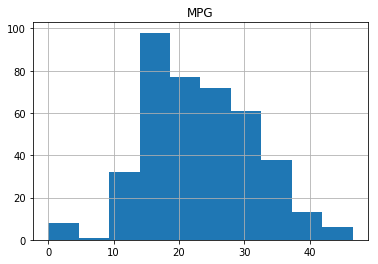

In [32]:
#histogram of MPG
cars.hist(column="MPG")
plt.show()

In [48]:
cars.hist(column="Origin")
plt.show()
#histogram cannot be done in categorical variable

ValueError: num must be 1 <= num <= 0, not 1

<Figure size 432x288 with 0 Axes>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018C4F61E3C8>]],
      dtype=object)

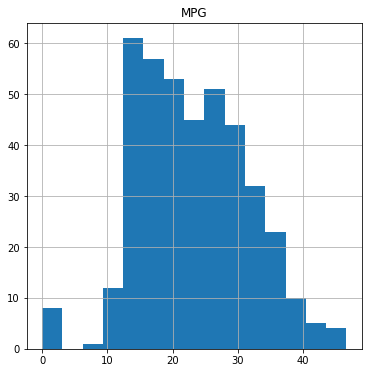

In [33]:
#Additional arguments: 
cars.hist(column="MPG",
          figsize=(6,6), #(length,height) of the plot in inches
          bins=15
         )


*Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html*

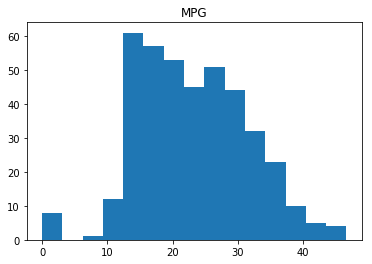

In [34]:
#Labelling the axes and giving the title
cars.hist(column="MPG",
          grid=False,  #do not include grid
          figsize=(6,4), #(length,height) of the plot in inches
          bins=15
         )

plt.show()

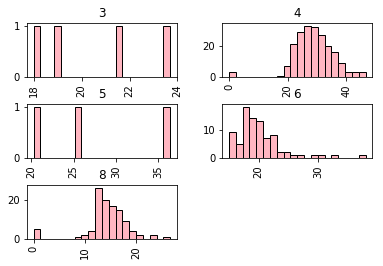

In [35]:
#Editing color and edgecolor
cars.hist(column="MPG",
          grid=False,  #do not include grid
          figsize=(6,4), #(length,height) of the plot in inches
          bins=20,
          color="lightpink",
          edgecolor="black",
          by="Cylinders"           
         )
plt.xlabel("Miles per Gallon",fontsize=12)
plt.ylabel("NUmber per cars",fontsize=12)
plt.title("histogram of MPG",fontsize=12)

plt.show()



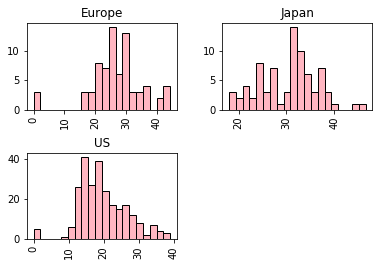

In [36]:
#Breaking up by the categories of a categorical variable
cars.hist(column="MPG",
          grid=False,  #do not include grid
          figsize=(6,4), #(length,height) of the plot in inches
          bins=20,
          color="lightpink",
          edgecolor="black",
          by="Origin"           
         )
plt.xlabel("Miles per Gallon",fontsize=12)
plt.ylabel("Number per cars",fontsize=12)
plt.title("histogram of MPG",fontsize=12)

plt.show()





#### 3B. Boxplots

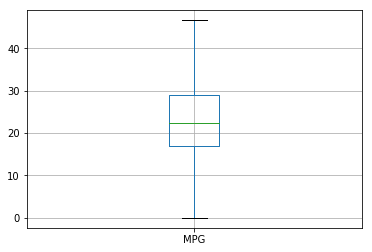

In [37]:
#Plotting a boxplot for the variable MPG
cars.boxplot(column="MPG")
plt.show()

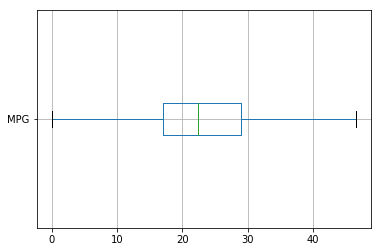

In [38]:
#Additional arguments (horizontal boxplot)
cars.boxplot(column="MPG",vert=False)
plt.show()


*Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html*

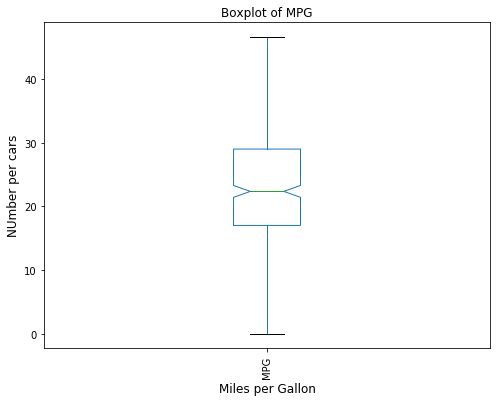

In [39]:
#Labelling the boxplot
cars.boxplot(column="MPG",
            notch=True,
            grid=False,
            rot=90,
            figsize=(8,6),
            vert=True)      #to plot the horizontal boxplot
plt.xlabel("Miles per Gallon",fontsize=12)
plt.ylabel("NUmber per cars",fontsize=12)
plt.title("Boxplot of MPG",fontsize=12)
plt.show()



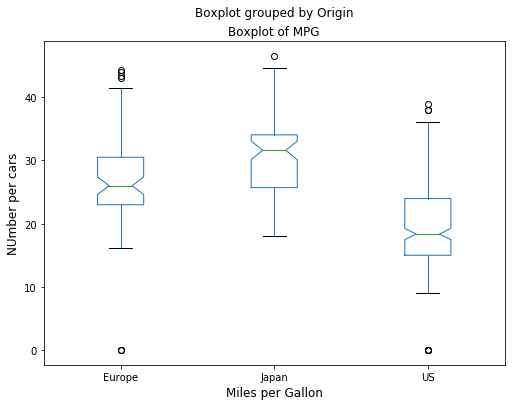

In [40]:
#Side by Side boxplot
#risk is always measured in terms of standard deviation
cars.boxplot(column="MPG",
             by="Origin",
            notch=True,
            grid=False,
            figsize=(8,6),
            vert=True)      #to plot the horizontal boxplot
plt.xlabel("Miles per Gallon",fontsize=12)
plt.ylabel("NUmber per cars",fontsize=12)
plt.title("Boxplot of MPG",fontsize=12)
plt.show()



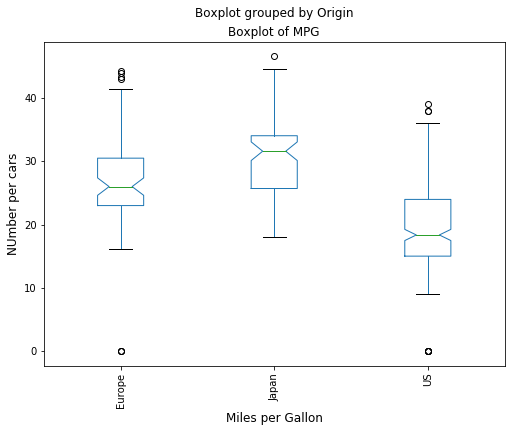

In [41]:
#The rotation argument
#Side by Side boxplot
cars.boxplot(column="MPG",
             by="Origin",
            notch=True,
            grid=False,
            figsize=(8,6),
             rot=90,
            vert=True)      #to plot the horizontal boxplot
plt.xlabel("Miles per Gallon",fontsize=12)
plt.ylabel("NUmber per cars",fontsize=12)
plt.title("Boxplot of MPG",fontsize=12)
plt.show()




#### 3C. Bar Plots

In [42]:
cars['Origin'].value_counts()

US        254
Japan      79
Europe     73
Name: Origin, dtype: int64

In [43]:
#plot is both for dataf and series
type(cars['Origin'].value_counts())

pandas.core.series.Series

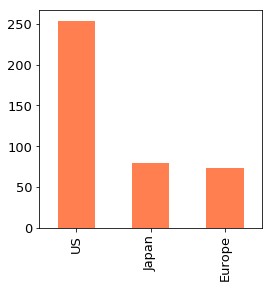

In [44]:
cars['Origin'].value_counts().plot(kind='bar',figsize=(4,4),      #'bar' for vertical bar and 'barh' is for  horizontal 
                                  color="coral",fontsize=13)

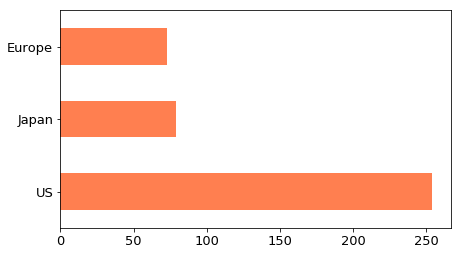

In [49]:
cars['Origin'].value_counts().plot(kind='barh',figsize=(7,4),        #barh for horizontal bar
                                  color="coral",fontsize=13)

Study pandas.DataFrame.plot: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html 

#### 3D. Scatter Plots

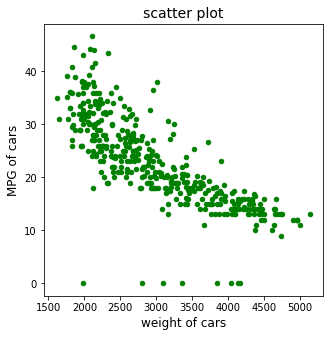

In [50]:
#Scatter plot 
cars.plot(kind="scatter",
         x="Weight",y="MPG",
         color="green",
         figsize=(5,5))

plt.xlabel("weight of cars",fontsize=12)
plt.ylabel("MPG of cars",fontsize=12)
plt.title("scatter plot",fontsize=14)
plt.show()
#roughly increasing(doubt-why it is even roughly increasing?????we can also say roughly decresing)

*Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html*

C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


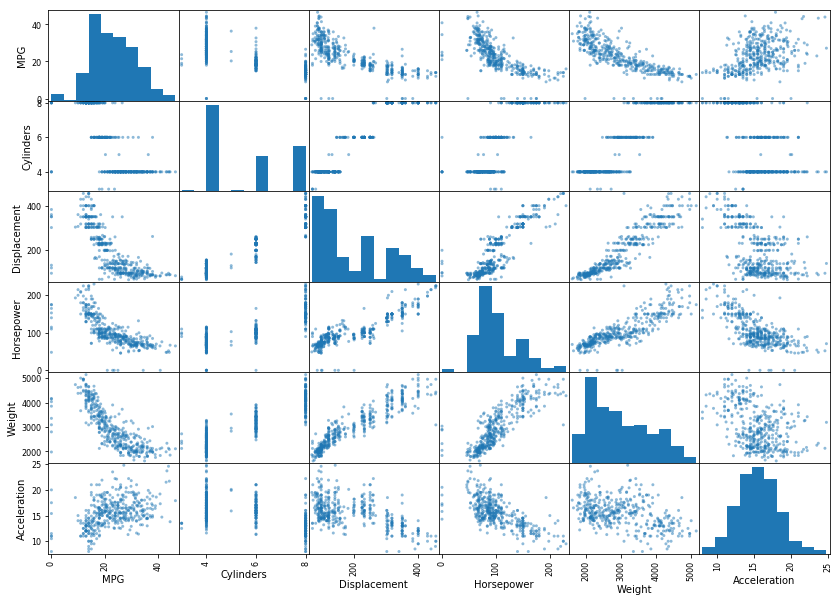

In [51]:
#Pairwise Scatterplot
from pandas.tools.plotting import scatter_matrix
scatter_matrix(cars.drop(["Car","Model","Origin"],axis=1),alpha=0.5,figsize=(14,10),diagonal='hist')
plt.show()

C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


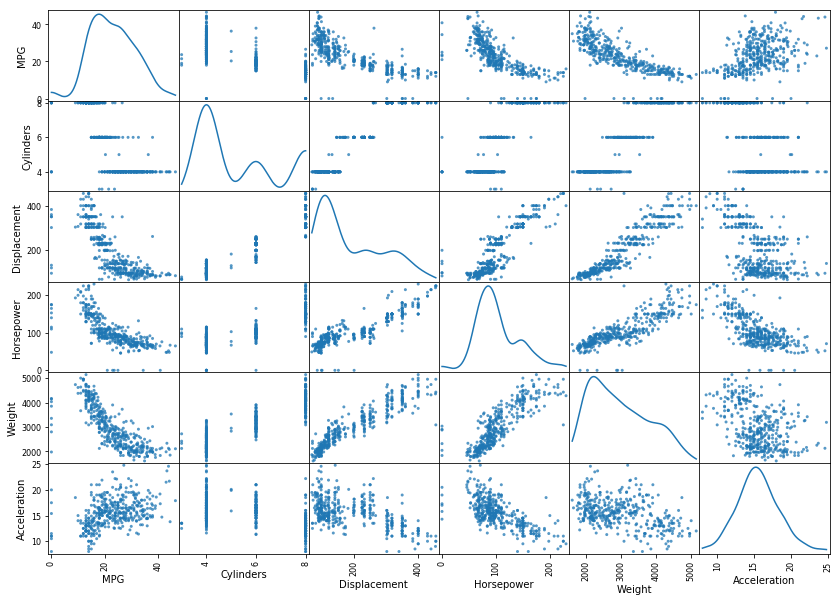

<Figure size 432x288 with 0 Axes>

In [52]:
#Exporting Graph
from pandas.tools.plotting import scatter_matrix
scatter_matrix(cars.drop(["Car","Model","Origin"],axis=1),alpha=0.75,figsize=(14,10),diagonal='kde')
#kde=kernel density estimation 
plt.show()

plt.savefig("scatter.png")       #saving the file to laptop

## Part 2 - Data Manipulation

#### 1. Sorting

In [53]:
#Sort the data in ascending order of MPG
cars.sort_values("MPG").head(10)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
13,Plymouth Satellite (sw),0.0,8,383.0,175,4166,10.5,70,US
367,Saab 900s,0.0,4,121.0,110,2800,15.4,81,Europe
17,Ford Mustang Boss 302,0.0,8,302.0,140,3353,8.0,70,US
39,Volkswagen Super Beetle 117,0.0,4,97.0,48,1978,20.0,71,Europe
10,Citroen DS-21 Pallas,0.0,4,133.0,115,3090,17.5,70,Europe
11,Chevrolet Chevelle Concours (sw),0.0,8,350.0,165,4142,11.5,70,US
12,Ford Torino (sw),0.0,8,351.0,153,4034,11.0,70,US
14,AMC Rebel SST (sw),0.0,8,360.0,175,3850,11.0,70,US
34,Hi 1200D,9.0,8,304.0,193,4732,18.5,70,US
31,Ford F250,10.0,8,360.0,215,4615,14.0,70,US


In [54]:
#Sort the data in descending order of MPG
cars.sort_values("MPG",ascending=0).head(10)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
329,Mazda GLC,46.6,4,86.0,65,2110,17.9,80,Japan
336,Honda Civic 1500 gl,44.6,4,91.0,67,1850,13.8,80,Japan
332,Volkswagen Rabbit C (Diesel),44.3,4,90.0,48,2085,21.7,80,Europe
402,Volkswagen Pickup,44.0,4,97.0,52,2130,24.6,82,Europe
333,Volkswagen Dasher (diesel),43.4,4,90.0,48,2335,23.7,80,Europe
251,Volkswagen Rabbit Custom Diesel,43.1,4,90.0,48,1985,21.5,78,Europe
316,Volkswagen Rabbit,41.5,4,98.0,76,2144,14.7,80,Europe
337,Renault Lecar Deluxe,40.9,4,85.0,0,1835,17.3,80,Europe
331,Datsun 210,40.8,4,85.0,65,2110,19.2,80,Japan
254,Datsun B210 GX,39.4,4,85.0,70,2070,18.6,78,Japan


In [55]:
#Sort the data in descending order of Origin and then by decresing order of MPG
cars.sort_values(["Origin","MPG"],ascending=[0,1])

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
11,Chevrolet Chevelle Concours (sw),0.0,8,350.0,165,4142,11.5,70,US
12,Ford Torino (sw),0.0,8,351.0,153,4034,11.0,70,US
13,Plymouth Satellite (sw),0.0,8,383.0,175,4166,10.5,70,US
14,AMC Rebel SST (sw),0.0,8,360.0,175,3850,11.0,70,US
17,Ford Mustang Boss 302,0.0,8,302.0,140,3353,8.0,70,US
34,Hi 1200D,9.0,8,304.0,193,4732,18.5,70,US
31,Ford F250,10.0,8,360.0,215,4615,14.0,70,US
32,Chevy C20,10.0,8,307.0,200,4376,15.0,70,US
33,Dodge D200,11.0,8,318.0,210,4382,13.5,70,US
74,Mercury Marquis,11.0,8,429.0,208,4633,11.0,72,US


In [56]:
#Saving in another data frame
cars2=cars.sort_values(["Origin","MPG"],ascending=[0,1])
cars2.head

<bound method NDFrame.head of                                   Car   MPG  Cylinders  Displacement  \
11   Chevrolet Chevelle Concours (sw)   0.0          8         350.0   
12                   Ford Torino (sw)   0.0          8         351.0   
13            Plymouth Satellite (sw)   0.0          8         383.0   
14                 AMC Rebel SST (sw)   0.0          8         360.0   
17              Ford Mustang Boss 302   0.0          8         302.0   
34                           Hi 1200D   9.0          8         304.0   
31                          Ford F250  10.0          8         360.0   
32                          Chevy C20  10.0          8         307.0   
33                         Dodge D200  11.0          8         318.0   
74                    Mercury Marquis  11.0          8         429.0   
110                  Chevrolet Impala  11.0          8         400.0   
131                  Oldsmobile Omega  11.0          8         350.0   
49                  Dodge Monaco (

In [ ]:
#2csv,#2xl

#### 2. Variable Transformation

In [ ]:
# Plot a scatter plot between MPG and weight. Comment of the linearity.
#it is curvy linear or roughly linear

C:\anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


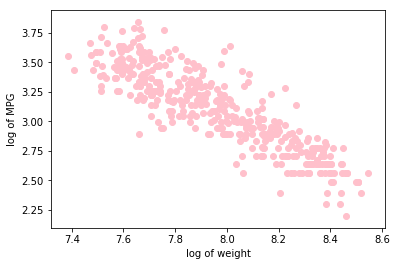

In [57]:
# Re-plot the scatter plot by taking the log transformation of both the variables. Does the linearity 
# Improve?
import numpy as np
plt.scatter(np.log(cars.Weight),np.log(cars.MPG),color="pink")
plt.xlabel("log of weight")
plt.ylabel("log of MPG")

plt.show()
####problem is log(0) in MPG columns
#problem using log is=we loose interpretability

In [58]:
# But there is a problem! Check the summary of log(MPG). What do you observe?
np.log(cars.MPG).describe()
#mean,std,min
#(doubt)why std is NAN??

C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


count    406.000000
mean           -inf
std             NaN
min            -inf
25%        2.833213
50%        3.106824
75%        3.367296
max        3.841601
Name: MPG, dtype: float64

In [59]:
# Can you identify where we got misleaded? Probably the answer lies in the summary of MPG.
# How can we correct this?
np.log(cars.MPG+1).describe()

count    406.000000
mean       3.085804
std        0.543030
min        0.000000
25%        2.890372
50%        3.150595
75%        3.401197
max        3.862833
Name: MPG, dtype: float64

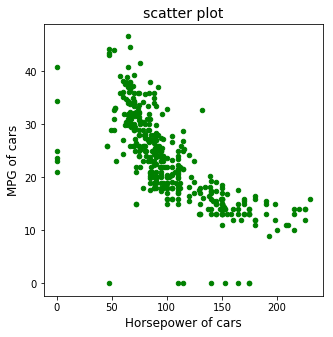

In [60]:
# Study the association between MPG and Horsepower. (Do Yourself)
cars.plot(kind="scatter",
         x="Horsepower",y="MPG",
         color="green",
         figsize=(5,5))

plt.xlabel("Horsepower of cars",fontsize=12)
plt.ylabel("MPG of cars",fontsize=12)
plt.title("scatter plot",fontsize=14)
plt.show()


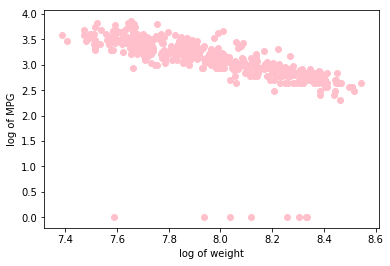

In [61]:
import numpy as np
plt.scatter(np.log(cars.Weight+1),np.log(cars.MPG+1),color="pink")
plt.xlabel("log of weight")
plt.ylabel("log of MPG")

plt.show()

In [62]:
cars.MPG.describe()

count    406.000000
mean      23.051232
std        8.401777
min        0.000000
25%       17.000000
50%       22.350000
75%       29.000000
max       46.600000
Name: MPG, dtype: float64

#### The np.where() function


In [9]:
import numpy as np


In [63]:
# PROBLEM 1:
# Create a variable HP which will take only two values:
# IF Horsepower < 100 THEN "Low HP"
# IF Horsepower >= 100 THEN "High HP"
cars["HP"]=np.where(cars.Horsepower>=100,"High","Low")
cars.tail(10)


,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,HP
396,Chrysler Lebaron Medallion,26.0,4,156.0,92,2585,14.5,82,US,Low
397,Ford Grenada l,22.0,6,232.0,112,2835,14.7,82,US,High
398,Toyota Celica GT,32.0,4,144.0,96,2665,13.9,82,Japan,Low
399,Dodge Charger 2.2,36.0,4,135.0,84,2370,13.0,82,US,Low
400,Chevrolet Camaro,27.0,4,151.0,90,2950,17.3,82,US,Low
401,Ford Mustang GL,27.0,4,140.0,86,2790,15.6,82,US,Low
402,Volkswagen Pickup,44.0,4,97.0,52,2130,24.6,82,Europe,Low
403,Dodge Rampage,32.0,4,135.0,84,2295,11.6,82,US,Low
404,Ford Ranger,28.0,4,120.0,79,2625,18.6,82,US,Low
405,Chevy S-10,31.0,4,119.0,82,2720,19.4,82,US,Low


In [65]:
#PROBLEM 2:
# Create a Variable MPG_Rate which will take on the values as follows:
# IF MPG < 15 THEN "Normal"
# IF MPG >= 15 AND MPG <=25 THEN "GOOD"
# IF MPG >= 25 AND MPG <=35 THEN "GREAT"
# IF MPG >= 35 THEN "AWESOME"

cars["MPG_Rate"]=np.where([[cars.MPG>=35, cars.MPG>=25],[cars.MPG>=15, cars.MPG<15]],
                         [["Awesome","GREAT"]],[["GOOD","NORMAL"]])
cars.tail(10)

#doubt

ValueError: operands could not be broadcast together with shapes (2,2,406) (1,2) (1,2) 